In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot 


from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore") # suppress warnings

## Load The Data


In [3]:
fraud_data = read_csv("C:\\Users\\soumy\\Downloads\\creditcard.csv")

## Understand data

In [4]:
set_option('display.width', 100)
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# The data Type of the attributes
fraud_data.shape

(284807, 31)

In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# count of null values
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
pd.set_option('display.precision', 2)

In [9]:
# Statistics Analysis of data
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,...,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,1.17e-15,3.42e-16,-1.38e-15,2.07e-15,9.60e-16,1.49e-15,-5.56e-16,1.21e-16,-2.41e-15,...,1.65e-16,-3.57e-16,2.58e-16,4.47e-15,5.34e-16,1.68e-15,-3.66e-16,-1.23e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,...,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,...,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,...,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,...,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,...,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,...,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


In [10]:
fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.48e+04,47488.15,0.00,54201.50,8.47e+04,139320.50,172792.00
V1,284807.0,1.17e-15,1.96,-56.41,-0.92,1.81e-02,1.32,2.45
V2,284807.0,3.42e-16,1.65,-72.72,-0.60,6.55e-02,0.80,22.06
V3,284807.0,-1.38e-15,1.52,-48.33,-0.89,1.80e-01,1.03,9.38
V4,284807.0,2.07e-15,1.42,-5.68,-0.85,-1.98e-02,0.74,16.88
V5,284807.0,9.60e-16,1.38,-113.74,-0.69,-5.43e-02,0.61,34.80
V6,284807.0,1.49e-15,1.33,-26.16,-0.77,-2.74e-01,0.40,73.30
V7,284807.0,-5.56e-16,1.24,-43.56,-0.55,4.01e-02,0.57,120.59
V8,284807.0,1.21e-16,1.19,-73.22,-0.21,2.24e-02,0.33,20.01
V9,284807.0,-2.41e-15,1.10,-13.43,-0.64,-5.14e-02,0.60,15.59


In [11]:
# Fraud vs Non-Fraud
class_name = {0: 'Not Fraud', 1: 'Fraud'}
print(fraud_data.Class.value_counts().rename(index = class_name))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
y = fraud_data['Class']
x = fraud_data.loc[:, fraud_data.columns != 'Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 42, stratify = y)

In [13]:
# import libraries for Accuracy Score
from sklearn.metrics import accuracy_score

#Import library for logistic regression
from sklearn.linear_model import LogisticRegression

# initialise the Logistic Regression classifier
logisreg = LogisticRegression()

#traiin the model using the training Dataset
logisreg.fit(x_train, y_train)

y_pred = logisreg.predict(x_test)

acc_logiserg = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Logistic Regression: ', acc_logiserg, '%')



Accuracy of Logistic Regression:  99.9 %


# Linear Discriminant Analysis

In [14]:
#Import library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialise the LDA Classifier
model = LinearDiscriminantAnalysis()

# Train the model using the training Dataset
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# calculate the accuracy score
acc_lda = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Linear Discriminant Analysis: ', acc_lda, '%')

Accuracy of Linear Discriminant Analysis:  99.93 %


In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_gnb = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Gaussian Naive Bayes: ', acc_gnb, '%')

Accuracy of Gaussian Naive Bayes:  99.28 %


# Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate accuracy
acc_rf = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Random Forest: ', acc_rf, '%')

Accuracy of Random Forest:  99.96 %


## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_dt = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Decision Tree: ', acc_dt, '%')

Accuracy of Decision Tree:  99.92 %


## K Nearest Neighbor Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of KNN Classifier: ', acc_knn, '%')

Accuracy of KNN Classifier:  99.83 %


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[94772,     0],
       [  160,     4]], dtype=int64)

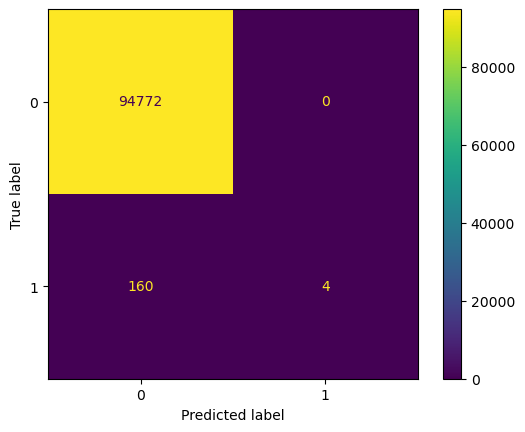

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
